In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.ticker import MaxNLocator

import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Set up path
excel_fpath = r"D:\Priyanshu\Wysa\dataset.xlsx"

### Load the Data

In [3]:
sheet_name = "Train"
df = pd.read_excel(excel_fpath, sheet_name=sheet_name)
df.sample(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
2288,new product idea: pants with a built in iphone...,iPhone,Positive emotion
8337,Wonder how many sold at #SXSW? iPad 2 Sold Out...,NaN,No emotion toward brand or product
5103,RT @mention Anyone know what time Apple popup ...,NaN,No emotion toward brand or product
901,Highlight of my day was undoubtedly meeting @m...,Google,Positive emotion
168,This is a #WINNING picture #android #google #s...,Android,Positive emotion
7767,Won a gift certificate to Apple at the Nonprof...,Apple,Positive emotion
7231,Another great panel at 5 pm at the Hilton - Au...,NaN,No emotion toward brand or product
7530,@mention says she feels sexier when she uses a...,NaN,No emotion toward brand or product
3796,#playhopskoch is in the apple app store (as we...,iPad or iPhone App,Positive emotion
5114,RT @mention Apple built a pop up store in 3 da...,NaN,No emotion toward brand or product


In [4]:
# Change column names
df.rename(
    columns={
        "tweet_text": "tweet",
        "emotion_in_tweet_is_directed_at": "brand_product_name",
        "is_there_an_emotion_directed_at_a_brand_or_product": "emotion_category",
    },
    inplace=True,
)
df.sample(10)

,tweet,brand_product_name,emotion_category
2238,Google Social Media RT @mention We interrupt y...,NaN,No emotion toward brand or product
3136,@mention go. &quot;@mention I'll be at the Au...,NaN,No emotion toward brand or product
2140,About to be interviewed by Mashable while wait...,NaN,No emotion toward brand or product
7862,#SXSW LOST! IPhone 3GS in black hard case with...,NaN,No emotion toward brand or product
415,Attending Designing iPad Interfaces - New Navi...,NaN,No emotion toward brand or product
4182,I think an iPad is eminent. Typing thoughtful ...,iPad,Positive emotion
2816,Wow RT @mention Yes! Gowalla wins best Andoid ...,Android App,Positive emotion
7437,My friends iphone changed BACK an hour instead...,iPhone,Negative emotion
8049,Mom (@mention quick - apply for a job @mention...,NaN,No emotion toward brand or product
3712,One Day Without Shoes (Thoms Shoes) New App fo...,NaN,No emotion toward brand or product


### Data Exploration

In [5]:
print(f"No. of data samples: {len(df)}")
print(f"No. of samples with unique tweets: {len(df.drop_duplicates(subset=['tweet']))}")

# Get samples with unique tweets
df.drop_duplicates(subset=["tweet"], inplace=True)
df.reset_index(drop=True, inplace=True)

No. of data samples: 8589
No. of samples with unique tweets: 8562


In [6]:
# Check for missing values
df.isnull().sum()

tweet                    1
brand_product_name    5282
emotion_category         0
dtype: int64

There are **5282** tweets that do not have any brand or product associated with them. 

Users assessed tweets related to various brands and products, providing evaluations on whether the sentiment conveyed was positive, negative, or neutral. Additionally, **if the tweet conveyed any sentiment, contributors identified the specific brand or product targeted by that emotion**.

However, the **absence of sentiment in the tweets does not necessarily imply the lack of a brand or product association**. This data can be **filled in through augmentation**, which can then be used to train a model aimed at determining the specific brand or product a particular tweet is associated with.

In [7]:
# Remove sample with no tweet
df.dropna(subset=["tweet"], inplace=True)
print(f"No. of samples with unique tweets: {len(df)}")

No. of samples with unique tweets: 8561


In [8]:
brand_products_list = df["brand_product_name"].unique()
emotions_list = df["emotion_category"].unique()

print(
    f"\nNo. of unique brands/products categories at which emotions were directed at: {len(brand_products_list)}"
)
for entity in brand_products_list:
    print(f"  - {entity}")

print(f"\nNo. of unique emotions: {len(emotions_list)}")
for emotion in emotions_list:
    print(f"  - {emotion}")


No. of unique brands/products categories at which emotions were directed at: 10
  - iPhone
  - iPad or iPhone App
  - iPad
  - Google
  - nan
  - Android
  - Apple
  - Android App
  - Other Google product or service
  - Other Apple product or service

No. of unique emotions: 4
  - Negative emotion
  - Positive emotion
  - No emotion toward brand or product
  - I can't tell


In [9]:
# Loop through each brand/product and fetch tweets for different emotion categories
for entity in brand_products_list:
    if pd.isna(entity):
        continue
    print(f"{entity}:\n{"=" * len(entity)}\n")
    entity_df = df.query("brand_product_name == @entity")
    for emotion in emotions_list:
        if emotion in entity_df["emotion_category"].unique():
            entity_emotion_df = entity_df.query("emotion_category == @emotion")
            print(f"{emotion}:\n{"-" * len(emotion)}")
            tweets = entity_emotion_df["tweet"].to_list()
            for tweet in np.random.choice(
                tweets, size=min(len(tweets), 5), replace=False
            ):
                print(f"- {tweet}")
        print()
    print(f"{"*" * 130}\n\n")

iPhone:

Negative emotion:
----------------
- RT @mention RT @mention forward to delicious T-Mobile 4G here in Austin while iPhone users struggle to do anything. #SXSW
- RT @mention forward to delicious T-Mobile 4G here in Austin while iPhone users struggle to do anything. #SXSW
- iPhone GPS is messed up. Thinks I'm in Yonkers. Almost as good as #SXSW. {link}
- Off to get my badge. Then to find food and drink. Then figure out why my @mention iPhone is NOT roaming at #sxsw. Then unpack. Priorities
- @mention arg. It won't load on me iPhone. Not via the app store or the site. Just trying to #sxsw it and am feelin so out of touch.

Positive emotion:
----------------
- At #SXSW with a thirsty gadget? Using @mention Charge Anywhere for my iPhone, happy to share some juice.
- Getting iPhone juiced by the #Sonos team at #sxsw next to Apple store in Austin gotta love it {link}
- Loving my Morphie JuicePack today for a recharge of iPhone. So worth it. #sxsw
- Looks like all the apps for #SXSW a

In [10]:
fig = px.histogram(
    df,
    x="brand_product_name",
    title="",
    template="ggplot2",
    color="brand_product_name",
    color_discrete_sequence=px.colors.sequential.Viridis,
    opacity=0.8,
    height=525,
    width=835,
)
fig.update_yaxes(title="Count")
fig.update_xaxes(title="Categories At Which Emotions In Tweets Were Directed At")
fig.update_layout(showlegend=False)
fig.show()

In [11]:
fig = px.histogram(
    df,
    x="emotion_category",
    title="",
    template="ggplot2",
    color="emotion_category",
    color_discrete_sequence=px.colors.sequential.Viridis,
    opacity=0.8,
    height=525,
    width=835,
)

fig.update_yaxes(title="Count")
fig.update_xaxes(title="Emotion Categories")
fig.update_layout(showlegend=False)
fig.show()

There are **only 9 tweets that fall under the category "I can't tell."** Since this category essentially overlaps with the "No emotion toward brand or product" category, we could potentially **merge these categories or remove them** for simplicity and clarity.

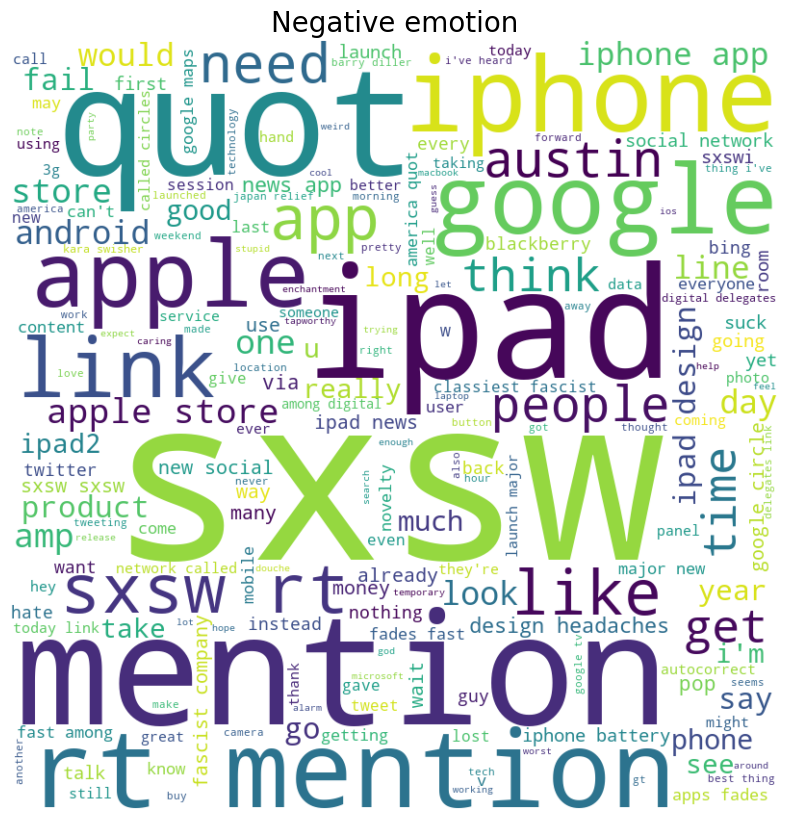

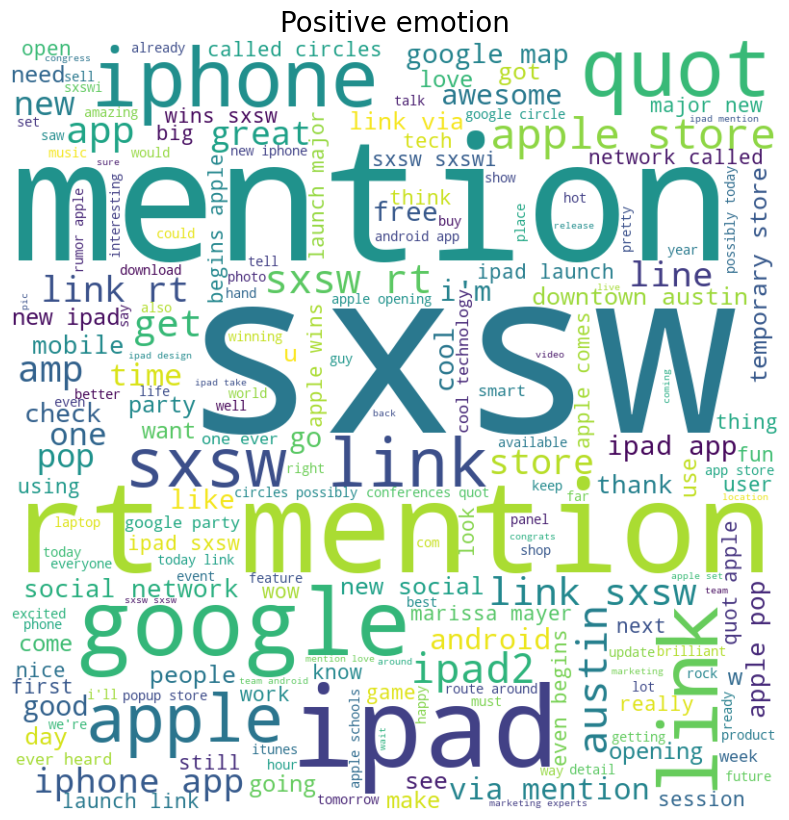

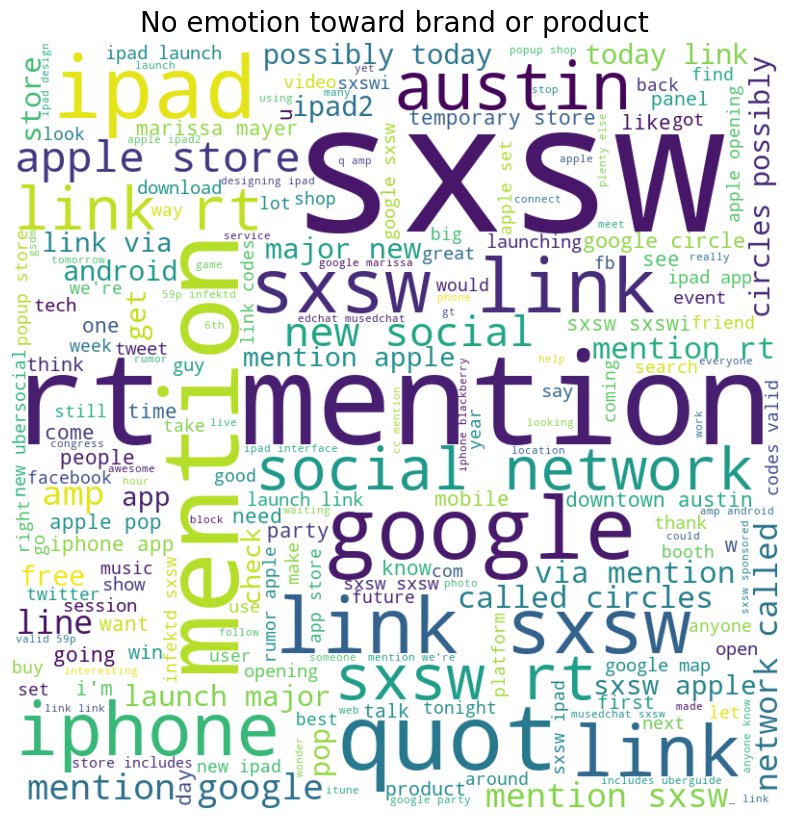

In [10]:
stop_words = set(stopwords.words("english"))


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color="white",
        stopwords=stop_words,
        min_font_size=10,
    ).generate(data)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(
        wordcloud, interpolation="bilinear"
    )  # Use bilinear interpolation for smoother rendering
    if title:
        plt.title(title, fontsize=20)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


def get_corpus(emo_type):
    corpus = ""
    # Iterate through the DataFrame rows
    for data_row in df.itertuples(index=False):
        if data_row.emotion_category == emo_type:
            text = data_row.tweet
            tokens = text.lower().split()
            corpus += " ".join(tokens) + " "
    return corpus.strip()


# Get corpus
negative_emo_corpus = get_corpus("Negative emotion")
positive_emo_corpus = get_corpus("Positive emotion")
no_emo_emo_corpus = get_corpus("No emotion toward brand or product")

show_wordcloud(negative_emo_corpus, "Negative emotion")
show_wordcloud(positive_emo_corpus, "Positive emotion")
show_wordcloud(no_emo_emo_corpus, "No emotion toward brand or product")

In [16]:
info = {}
for emotion in df["emotion_category"].unique():
    info[emotion] = {"num_links": 0, "num_mentions": 0}

for data_row in df.itertuples():
    tweet, emotion = data_row.tweet, data_row.emotion_category
    if r"{link}" in tweet:
        info[emotion]["num_links"] += 1
    elif "@mention" in tweet:
        info[emotion]["num_mentions"] += 1

info

{'Negative emotion': {'num_links': 85, 'num_mentions': 179},
 'Positive emotion': {'num_links': 1064, 'num_mentions': 760},
 'No emotion toward brand or product': {'num_links': 2820,
  'num_mentions': 1306},
 "I can't tell": {'num_links': 1, 'num_mentions': 1}}

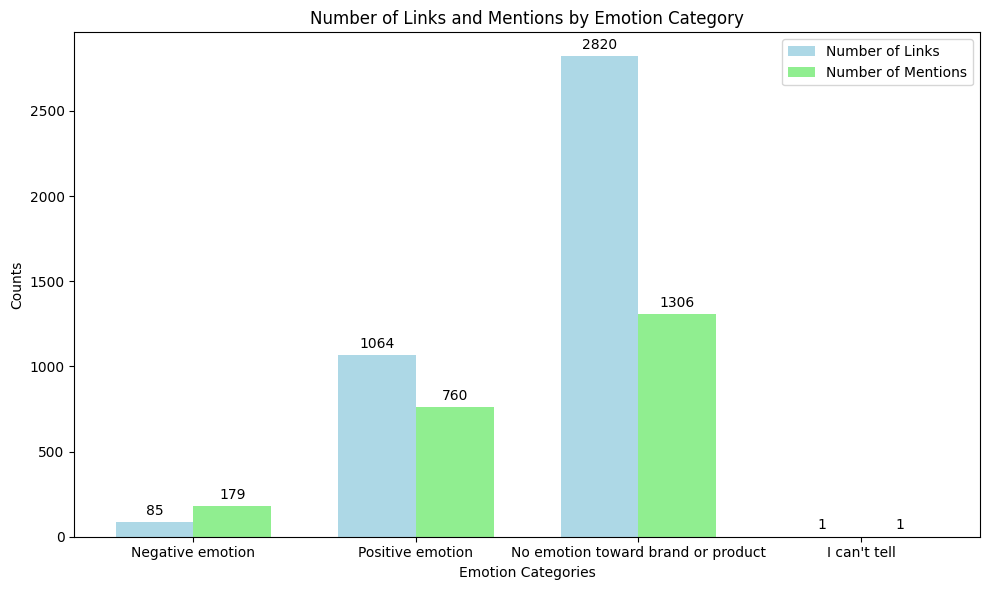

In [17]:
categories = list(info.keys())
num_links = [info[category]["num_links"] for category in categories]
num_mentions = [info[category]["num_mentions"] for category in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(
    x - width / 2, num_links, width, label="Number of Links", color="lightblue"
)
bars2 = ax.bar(
    x + width / 2, num_mentions, width, label="Number of Mentions", color="lightgreen"
)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel("Emotion Categories")
ax.set_ylabel("Counts")
ax.set_title("Number of Links and Mentions by Emotion Category")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()


# Adding value labels on the bars
def add_value_labels(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


add_value_labels(bars1)
add_value_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()

This bar graph reveals the differences in engagement between emotion categories:
  - **Positive emotions** show more links relative to mentions, possibly **indicating higher sharing activity**.
  - **Negative emotions** are more mention-heavy, indicating a tendency for people to discuss rather than share links.

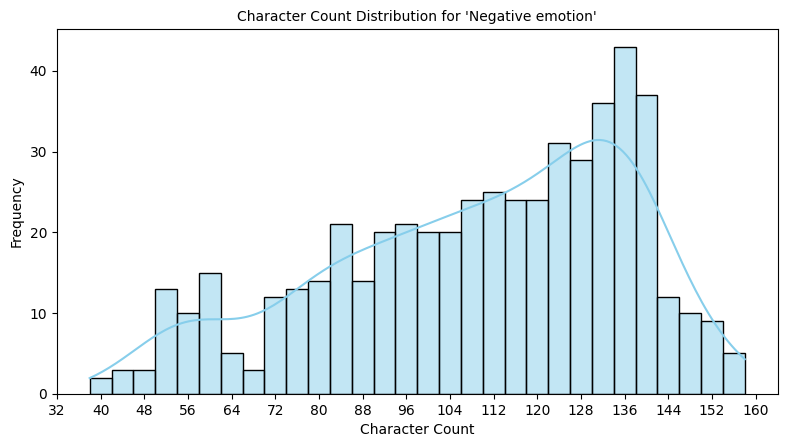

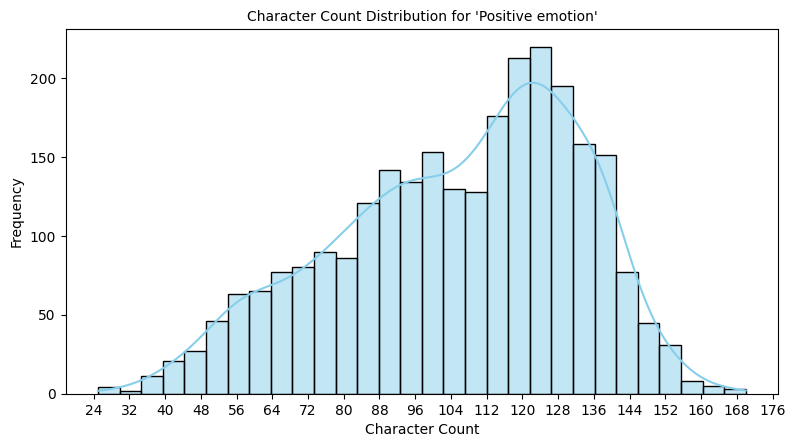

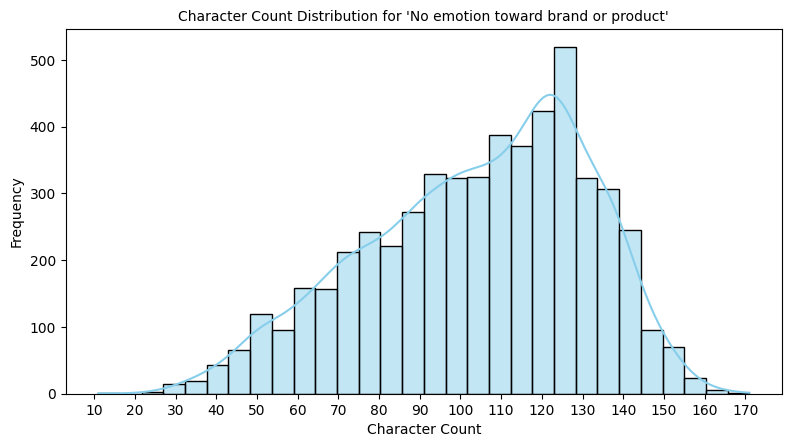

In [ ]:
# Calculate character count for each tweet
df["char_count"] = df["tweet"].apply(lambda x: len(str(x)))


def plot_char_count(df):
    # Set up the figure
    fig = plt.figure(constrained_layout=True, figsize=(15, 8))
    grid = plt.GridSpec(ncols=2, nrows=2, figure=fig)

    # Histogram with KDE
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title(
        f"Character Count Distribution for '{df.emotion_category.unique()[0]}'",
        fontsize=10,
    )
    sns.histplot(df["char_count"], kde=True, bins=30, color="skyblue", ax=ax1)
    ax1.set_xlabel("Character Count")
    ax1.set_ylabel("Frequency")
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


plot_char_count(df[df["emotion_category"] == "Negative emotion"])
plot_char_count(df[df["emotion_category"] == "Positive emotion"])
plot_char_count(df[df["emotion_category"] == "No emotion toward brand or product"])

When looking at the number of characters per tweet, we can infer that negative comments are longer than neutral and positive comments. This may mean that people may feel the need to elaborate on what they found disappointing, frustrating, or upsetting.